In [96]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [11]:
df = pd.read_csv('output.csv')
df['Check-in Date'] = pd.to_datetime(df['Check-in Date'])
df['Report Date'] = pd.to_datetime(df['Report Date'])
df['Day of Week'] = df['Check-in Date'].dt.day_name()
df['Check-in Week'] = df['Check-in Date'].dt.to_period('W').apply(lambda r: r.start_time)
#Get only the most recent data
most_recent = df['Report Date'].max()
#df = df[df['Report Date'] == df['Report Date'].max()]
df

,Room Type,Guests,Price,Rating,Check-in Date,Report Date,HWV Property,Competitor,Day of Week,Check-in Week
0,Deluxe King Room,2,163,8.6,2025-01-03,2025-01-02,HH,Pea Soup Andersens,Friday,2024-12-30
1,Deluxe King Room Upstairs,2,163,8.6,2025-01-03,2025-01-02,HH,Pea Soup Andersens,Friday,2024-12-30
2,Standard Queen Room with Two Queen Beds,4,139,8.6,2025-01-03,2025-01-02,HH,Pea Soup Andersens,Friday,2024-12-30
3,Deluxe Queen Room with Two Queen Beds,4,163,8.6,2025-01-03,2025-01-02,HH,Pea Soup Andersens,Friday,2024-12-30
4,Deluxe King Room,2,185,8.6,2025-01-04,2025-01-02,HH,Pea Soup Andersens,Saturday,2024-12-30
...,...,...,...,...,...,...,...,...,...,...
6081,Queen Studio Suite - Non-Smoking,5,411,8.8,2025-02-02,2025-01-03,SWI,Hampton Inn,Sunday,2025-01-27
6082,Queen Studio Suite - Non-Smoking,5,425,8.8,2025-02-02,2025-01-03,SWI,Hampton Inn,Sunday,2025-01-27
6083,Queen Studio Suite - Non-Smoking,6,573,8.8,2025-02-02,2025-01-03,SWI,Hampton Inn,Sunday,2025-01-27
6084,Queen Studio Suite - Non-Smoking,6,595,8.8,2025-02-02,2025-01-03,SWI,Hampton Inn,Sunday,2025-01-27


In [99]:
def plot_pricing(df,prop,date=most_recent,figsize = (10,6),save_graph = False):
    sns.set_theme(context='notebook',style = 'whitegrid')
    filtered = df[(df['HWV Property'] == prop) & (df['Report Date'] == date)]

    plt.figure(figsize=figsize)
    sns.lineplot(x='Check-in Date', y='Price', hue = 'Competitor', data=filtered, errorbar = None)

    # Format the x-axis to show dates more sparsely
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Show every 5th day
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Rotate date labels for better readability
    plt.gcf().autofmt_xdate()
    plt.title(f"{prop} Compset Pricing Report: {date.strftime('%m/%d/%y')}",fontweight = 'bold')
    if save_graph:
        plt.savefig(os.path.join('Plots',f"{prop}_pricing_{date.strftime('%m-%d-%y')}.png"))
    plt.show()
def plot_dow(df,prop,date=most_recent,figsize = (10,6),save_graph = False):
    sns.set_theme(context = 'notebook',style = 'darkgrid')
    
    report_start = date.strftime('%m/%d/%y')
    report_end = (date + timedelta(days = 30)).strftime('%m/%d/%y')
    plt.figure(figsize=figsize)
    filtered = df[(df['HWV Property'] == prop) & (df['Report Date'] == date)]
    sns.barplot(data=filtered, x='Day of Week',y='Price',hue='Competitor')
    plt.title(f"{prop} Compset - Average Price by Day of Week: ({report_start} - {report_end})",fontweight = 'bold')
    if save_graph:
        plt.savefig(os.path.join('Plots',f"{prop}_dow_{date.strftime('%m-%d-%y')}.png"))
    plt.show()
def plot_room_types(df,prop,date=most_recent,save_graph = False):
    sns.set_theme(context='notebook',style = 'whitegrid')

    filtered = df[(df['HWV Property'] == prop) & (df['Report Date'] == date)]
    report_start = date.strftime('%m/%d/%y')
    report_end = (date + timedelta(days = 30)).strftime('%m/%d/%y')
    
    comps = filtered['Competitor'].unique()
    num_comps = len(comps)
    fig ,ax = plt.subplots(num_comps,1,figsize = (10,4*num_comps))
    for i, comp in enumerate(comps):
        comp_data = filtered[filtered['Competitor'] == comp]
        sns.barplot(data = comp_data, x = 'Price', y = 'Room Type', hue = 'Room Type', ax = ax[i])
        sns.despine(left=True)
        ax[i].set_title(comp)
        ax[i].set_ylabel('')
    plt.tight_layout()
    fig.suptitle(f"{prop} Compset: Average Pricing by Room Type ({report_start} - {report_end})",fontweight = 'bold')
    plt.subplots_adjust(top=0.93)
    if save_graph:
        plt.savefig(os.path.join('Plots',f"{prop}_room_types_{date.strftime('%m-%d-%y')}.png"))
    plt.show()
def plot_compset_change(df,prop, date = most_recent,save_graph = False):
    sns.set_theme(context = 'notebook', style = 'whitegrid')

    filtered  = df[(df['HWV Property'] == prop) & (df['Report Date'] >= date - timedelta(days = 14))].copy()
    filtered['Formatted Date'] = filtered['Check-in Week'].dt.strftime('%m/%d/%y') + ' - ' + (filtered['Check-in Week'] + timedelta(days = 6)).dt.strftime('%m/%d/%y')
    g = sns.FacetGrid(filtered, col = 'Formatted Date',col_wrap = 2,height = 4, aspect = 1.5, sharey = False)
    g.map_dataframe(sns.lineplot, x = 'Report Date', y = 'Price', hue = 'Competitor', marker = 'o',errorbar = None)


    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(45)

    
    g.set_axis_labels('Report Date','Average Price')
    g.add_legend(title = 'Competitor', loc='lower center',ncols = 5,bbox_to_anchor=(0.5, -0.05))
    g.set_titles(col_template='{col_name}', fontweight = 'bold')
    plt.setp(g.legend.get_title(), fontweight='bold')
    
    plt.suptitle(f"{prop} - Compset Pricing Changes over Time", fontweight = 'bold')
    plt.subplots_adjust(top=0.90)
    plt.tight_layout()
    if save_graph:
        plt.savefig(os.path.join('Plots',f"{prop}_compset_change_{date.strftime('%m-%d-%y')}.png"))
    plt.show()
    
def get_graphs(df,prop,date = most_recent, figsize = (10,6),save_graphs = False):
    plot_pricing(df,prop,date = date,figsize = figsize,save_graph = save_graphs)
    plot_dow(df,prop,date = date,figsize = figsize,save_graph = save_graphs)
    plot_room_types(df,prop,date = date,save_graph = save_graphs)
    plot_compset_change(df,prop,date,save_graph = save_graphs)

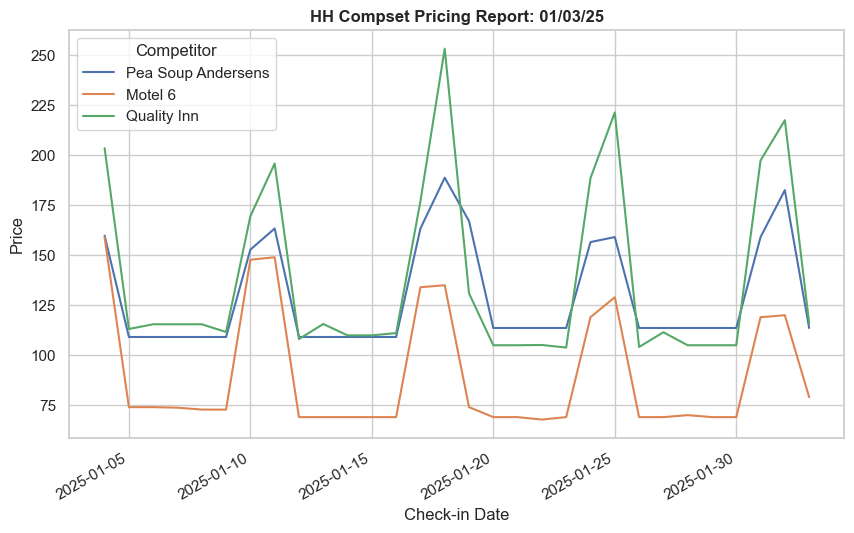

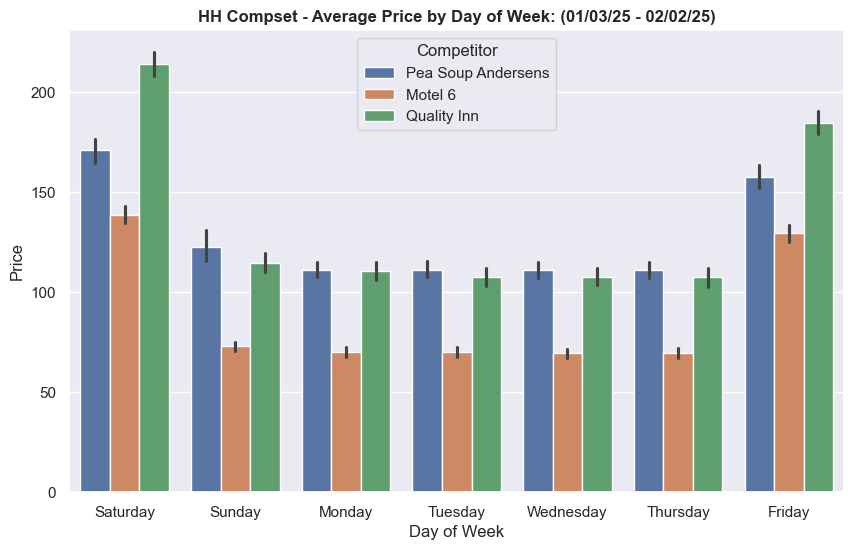

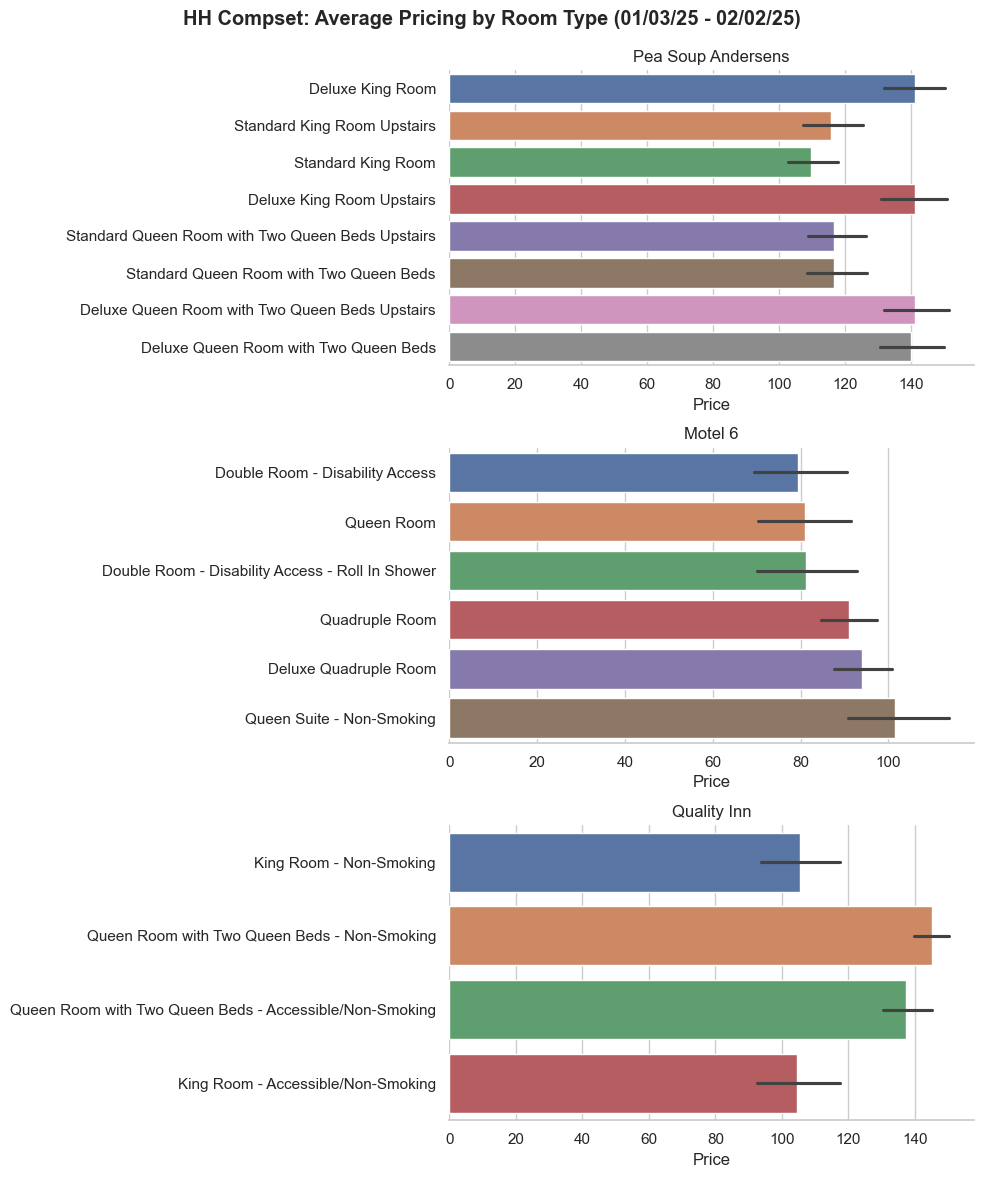

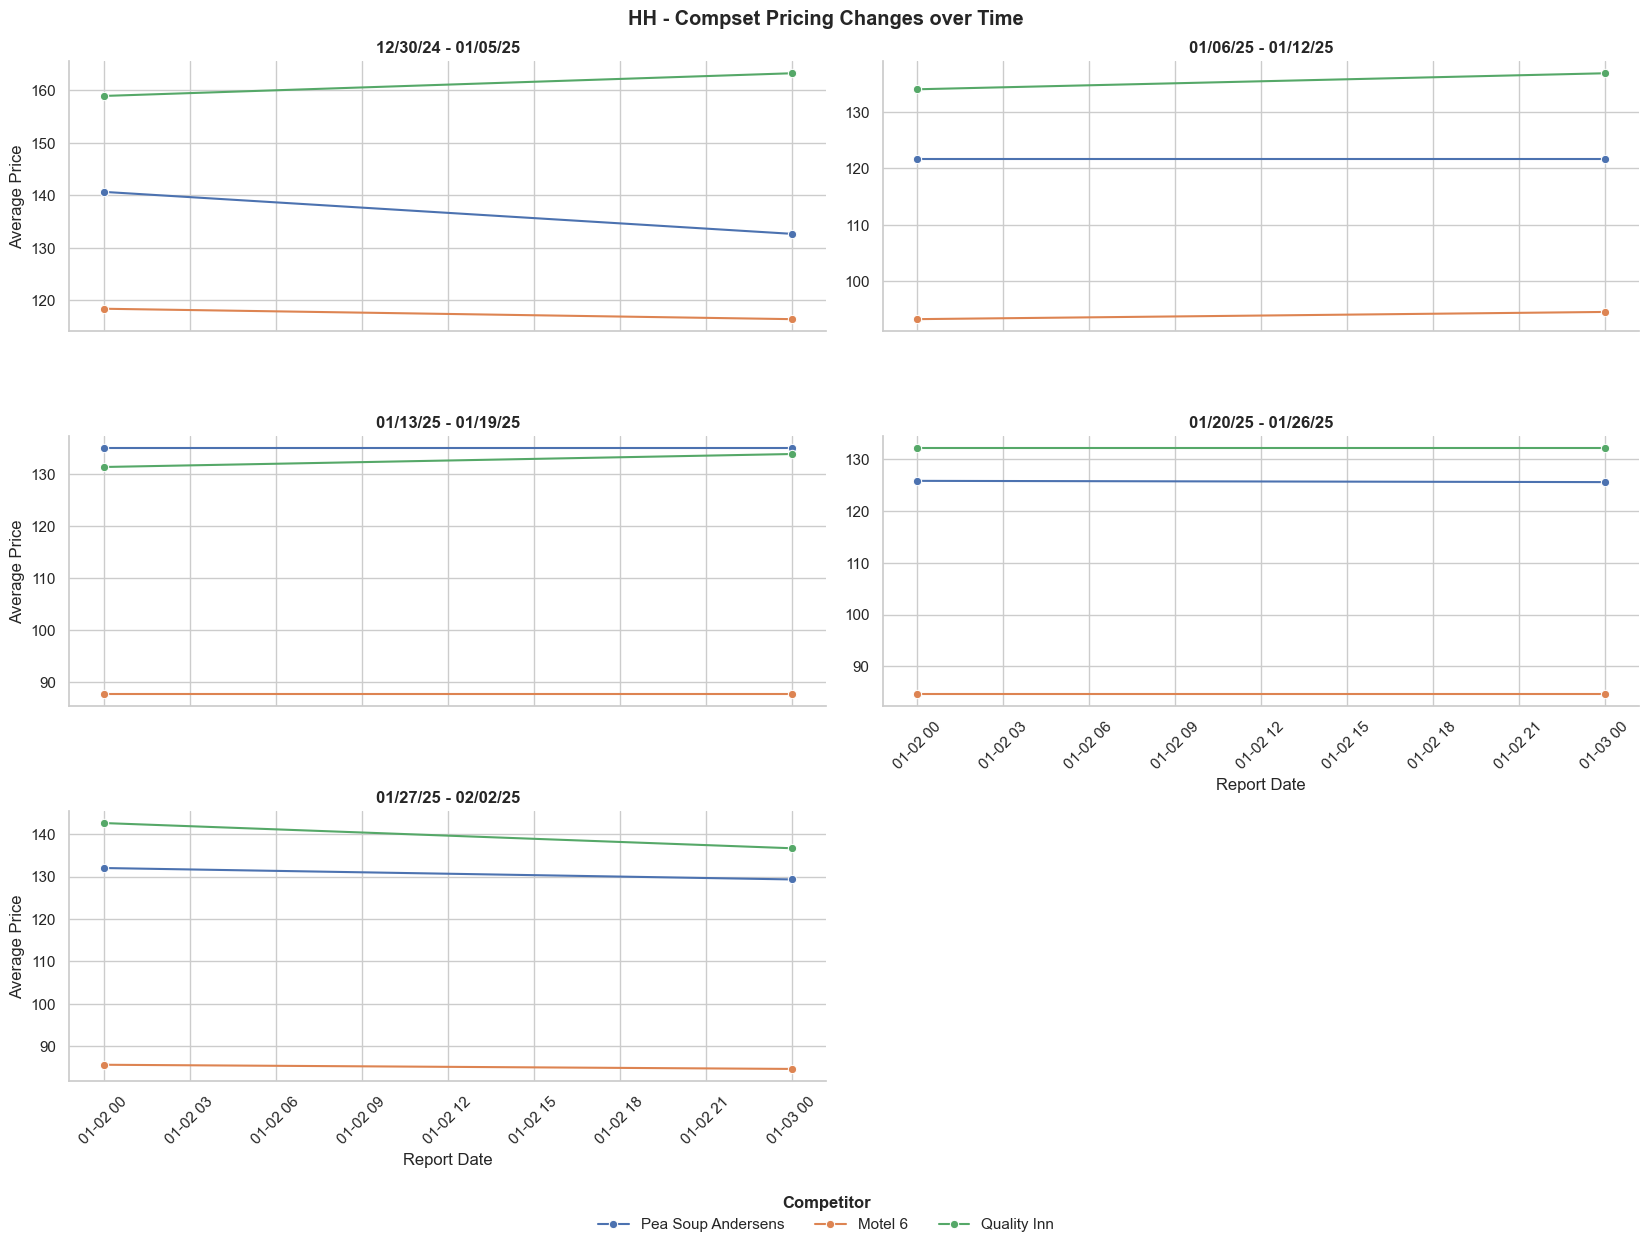

In [100]:
get_graphs(df,'HH',save_graphs = True)